In [2]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [5]:
df = pd.read_csv('preprocessed.csv')
df.head()

,text,class,char_length,token_length
0,sex wife threatening suicide recently left wif...,1,364,54
1,weird affected compliment coming know girl fee...,0,76,11
2,finally thousand hear thousand bad year swear ...,0,66,10
3,need help help hard,1,33,6
4,ism lost hello adam sixteen 've struggling yea...,1,1376,193


In [6]:
df['text'] = df['text'].fillna('')

In [7]:
# Split the data into train, test, and validation sets
train_data, test_data, train_labels, test_labels = train_test_split(df['text'], df['class'], test_size=0.2, random_state=42, stratify=df['class'])
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.25, random_state=42, stratify=train_labels)


In [8]:
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(train_data)
val_vectors = vectorizer.transform(val_data)
test_vectors = vectorizer.transform(test_data)

In [72]:
# Cluster the data using K-means
kmeans2 = KMeans(n_clusters=2, random_state=42)
kmeans2.fit(train_vectors)

KMeans(n_clusters=2, random_state=42)

In [74]:
# Predict the clusters for the validation and test data
val_predictions2 = kmeans2.predict(val_vectors)
test_predictions2 = kmeans2.predict(test_vectors)

In [76]:
# Evaluate the performance of the model
val_accuracy2 = accuracy_score(val_labels, val_predictions2)
val_precision2 = precision_score(val_labels, val_predictions2)
val_recall2 = recall_score(val_labels, val_predictions2)
val_f12 = f1_score(val_labels, val_predictions2)

test_accuracy2 = accuracy_score(test_labels, test_predictions2)
test_precision2 = precision_score(test_labels, test_predictions2)
test_recall2 = recall_score(test_labels, test_predictions2)
test_f12 = f1_score(test_labels, test_predictions2)

print("Validation accuracy:", val_accuracy2)
print("Validation precision:", val_precision2)
print("Validation recall:", val_recall2)
print("Validation F1 score:", val_f12)

print("Test accuracy:", test_accuracy2)
print("Test precision:", test_precision2)
print("Test recall:", test_recall2)
print("Test F1 score:", test_f12)


Validation accuracy: 0.808267597741282
Validation precision: 0.9062411266965756
Validation recall: 0.6877558936344438
Validation F1 score: 0.7820248946388316
Test accuracy: 0.8043665675244622
Test precision: 0.8999886736889795
Test recall: 0.6849114338663104
Test F1 score: 0.7778566359119943


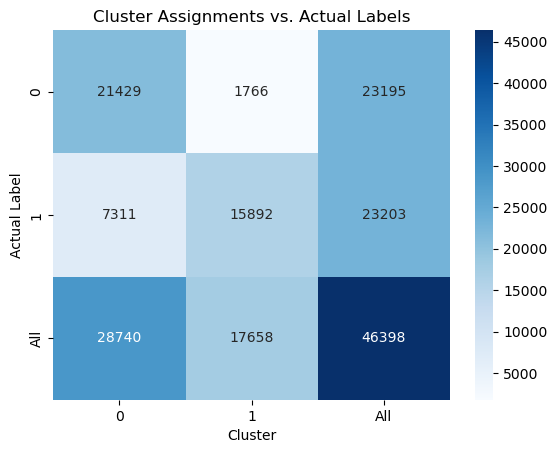

In [77]:
import seaborn as sns

# create a DataFrame with the predicted clusters and actual labels
df = pd.DataFrame({'Cluster': test_predictions2, 'Class': test_labels})

# create a contingency table of cluster assignments vs. actual labels
contingency_table = pd.crosstab(df['Class'], df['Cluster'], margins=True)

# plot the heatmap using Seaborn
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Cluster Assignments vs. Actual Labels')
plt.xlabel('Cluster')
plt.ylabel('Actual Label')
plt.show()

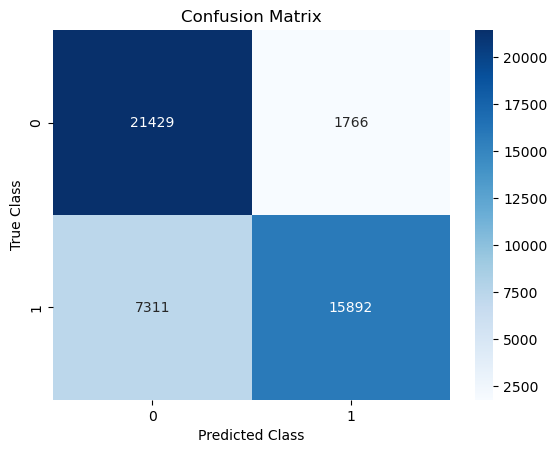

In [78]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_matrix = confusion_matrix(test_labels, test_predictions2)

# Plot the confusion matrix as a heatmap
sns.heatmap(conf_matrix, cmap='Blues', annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()


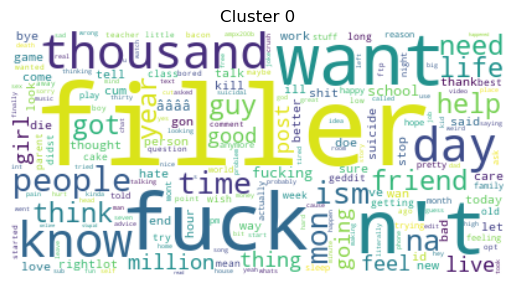

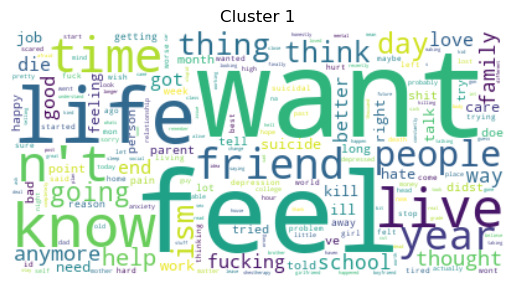

In [79]:
from wordcloud import WordCloud
num_clusters = 2
# Combine the text data for each cluster
cluster_text = [' '.join(test_data[test_predictions2 == i]) for i in range(num_clusters)]

# Create a wordcloud for each cluster
for i, text in enumerate(cluster_text):
    wordcloud = WordCloud(background_color='white', collocations=False).generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Cluster {}'.format(i))
    plt.axis('off')
    plt.show()


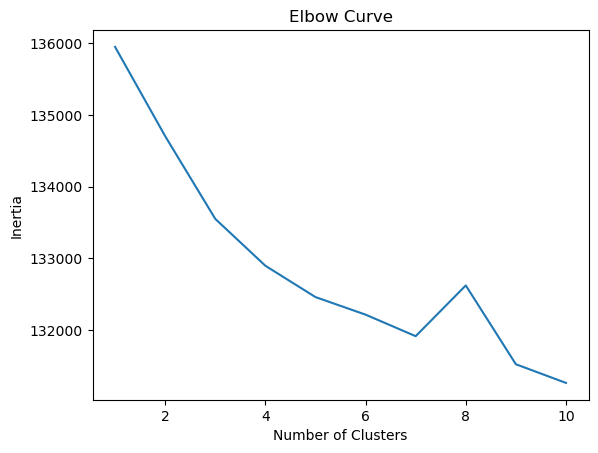

In [30]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate inertia for different values of k
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(train_vectors)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia)
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [9]:
optimal_clusters = 7

In [10]:
# Fit KMeans clustering model
kmeans7 = KMeans(n_clusters=7, random_state=42)
kmeans7.fit(train_vectors)

# Get the predicted labels for test,train,validation sets
test_predictions7 = kmeans7.predict(test_vectors)
train_predictions7 = kmeans7.predict(train_vectors)
val_predictions7 = kmeans7.predict(val_vectors)

In [13]:
# Evaluate the model
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Silhouette Score
silhouette_test = silhouette_score(test_vectors, test_predictions7)
silhouette_train = silhouette_score(train_vectors, train_predictions7)
silhouette_val = silhouette_score(val_vectors, val_predictions7)

print("Silhouette Score (Test):", silhouette_test)
print("Silhouette Score (Train):", silhouette_train)
print("Silhouette Score (Validation):", silhouette_val)


Silhouette Score (Test): 0.008903450943786537
Silhouette Score (Train): 0.008968418409794425
Silhouette Score (Validation): 0.009434462131623036


In [ ]:
# Calinski Harabasz Score
calinski_test = calinski_harabasz_score(test_vectors.toarray(), test_predictions7)
calinski_train = calinski_harabasz_score(train_vectors.toarray(), train_predictions7)
calinski_val = calinski_harabasz_score(val_vectors.toarray(), val_predictions7)

print("\nCalinski Harabasz Score (Test):", calinski_test)
print("Calinski Harabasz Score (Train):", calinski_train)
print("Calinski Harabasz Score (Validation):", calinski_val)

In [ ]:
# Davies Bouldin Score
davies_test = davies_bouldin_score(test_vectors.toarray(), test_predictions7)
davies_train = davies_bouldin_score(train_vectors.toarray(), train_predictions7)
davies_val = davies_bouldin_score(val_vectors.toarray(), val_predictions7)

print("\nDavies Bouldin Score (Test):", davies_test)
print("Davies Bouldin Score (Train):", davies_train)
print("Davies Bouldin Score (Validation):", davies_val)

In [18]:
from collections import Counter

# Count the number of items in each cluster for test, train, and validation sets
test_cluster_counts = Counter(test_predictions7)
train_cluster_counts = Counter(train_predictions7)
val_cluster_counts = Counter(val_predictions7)

# Print the cluster counts
print("Test Cluster Counts:", test_cluster_counts)
print("Train Cluster Counts:", train_cluster_counts)
print("Validation Cluster Counts:", val_cluster_counts)


Test Cluster Counts: Counter({4: 23365, 0: 11368, 1: 4003, 5: 3476, 2: 2136, 3: 1600, 6: 450})
Train Cluster Counts: Counter({4: 70506, 0: 33729, 1: 11723, 5: 10624, 2: 6258, 3: 4928, 6: 1425})
Validation Cluster Counts: Counter({4: 23373, 0: 11318, 1: 3969, 5: 3593, 2: 2039, 3: 1625, 6: 481})


In [18]:
# Print the top words in each cluster

order_centroids = kmeans7.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(optimal_clusters):
    print('Cluster %d:' % i)
    for j in order_centroids[i, :10]:
        print(' %s' % terms[j])

Cluster 0:
 feel
 live
 like
 life
 know
 time
 friend
 year
 want
 people
Cluster 1:
 want
 die
 anymore
 know
 life
 feel
 kill
 live
 like
 fucking
Cluster 2:
 na
 wan
 gon
 like
 talk
 ism
 bored
 know
 chat
 want
Cluster 3:
 girl
 like
 guy
 friend
 boy
 know
 said
 want
 crush
 talk
Cluster 4:
 like
 day
 people
 post
 know
 need
 guy
 help
 got
 time
Cluster 5:
 ism
 ve
 feel
 like
 want
 know
 life
 going
 time
 think
Cluster 6:
 filler
 text
 bored
 na
 wan
 ism
 day
 post
 award
 like


C:\Users\Mingqi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


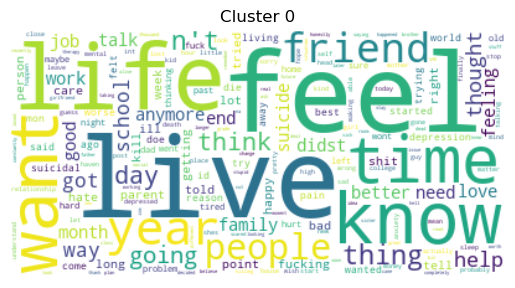

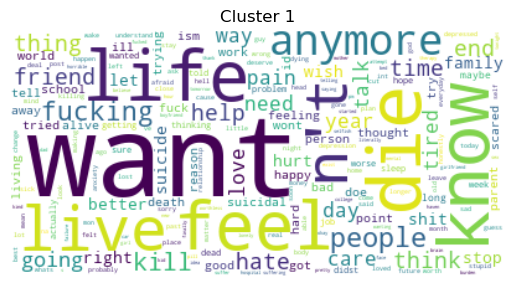

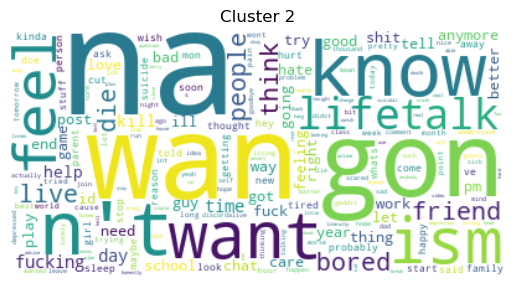

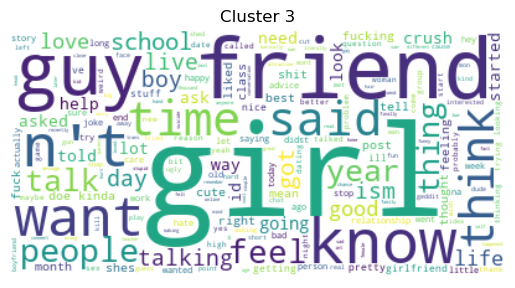

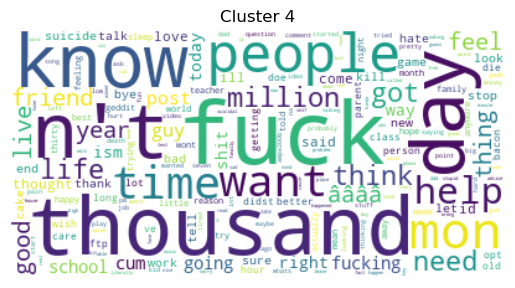

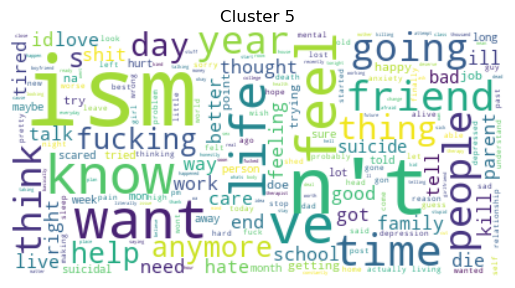

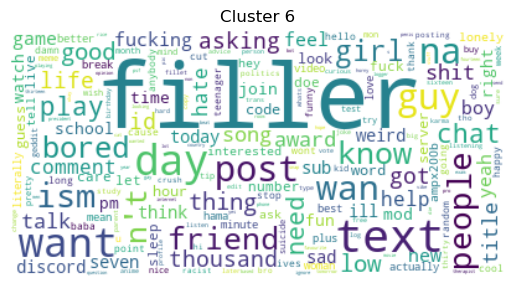

In [81]:
# Combine the text data for each cluster
cluster_text7 = [' '.join(test_data[test_predictions7 == i].str.lower()) for i in range(optimal_clusters)]

# Create a wordcloud for each cluster
for i, text in enumerate(cluster_text7):
    wordcloud = WordCloud(background_color='white', collocations=False).generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Cluster {i}')
    plt.axis('off')
    plt.show()
